In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')

# Create data

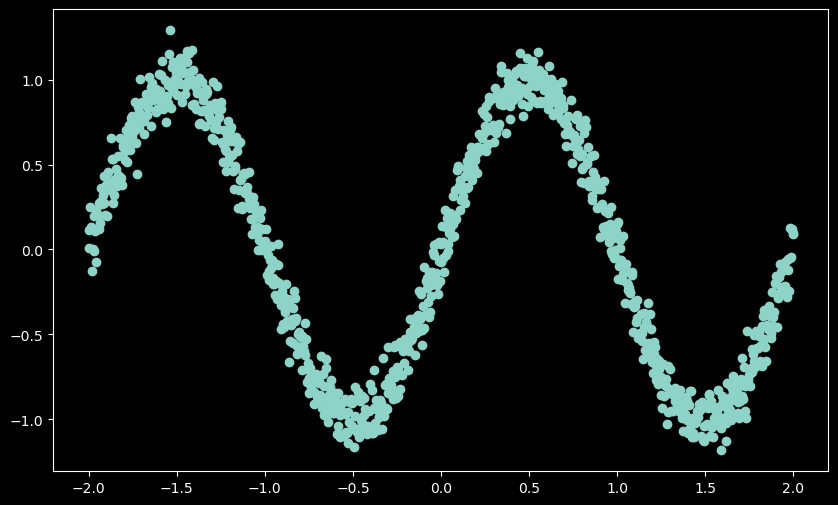

In [10]:
nPts = 1000

m = 0.5
b = 1

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

#y = m*x + b
#y = x**2
y = np.sin(2*np.pi*x/2)

y += np.random.normal(0, 0.1, nPts)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data')
plt.show()

# Modeling

### Train / test split

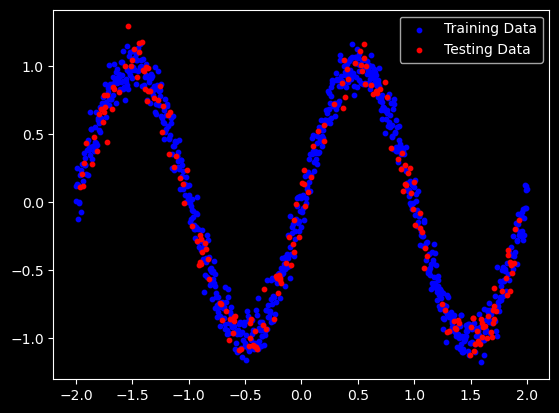

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_ext = np.linspace(-4, 4, nPts)

markersize = 10
plt.scatter(X_train[:,0], y_train, label='Training Data', c='b', s=markersize);
plt.scatter(X_test[:,0], y_test, label='Testing Data', c='r', s=markersize);
plt.legend()

### Create and train models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1, weights='uniform'),
    KNeighborsRegressor(n_neighbors=10, weights='uniform'),
    KNeighborsRegressor(n_neighbors=100, weights='uniform'),
    DecisionTreeRegressor(max_depth=2),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=10),
    RandomForestRegressor(n_estimators=10, max_depth=5),
    RandomForestRegressor(n_estimators=100, max_depth=10),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2),
    MLPRegressor(hidden_layer_sizes=(30,20,10), max_iter=1000, tol=0.00001, n_iter_no_change=10)
]

LinearRegression()
 r2_train:   0.14157
 r2_test:    0.19865
 rmse_train: 0.43309
 rmse_test:  0.42125


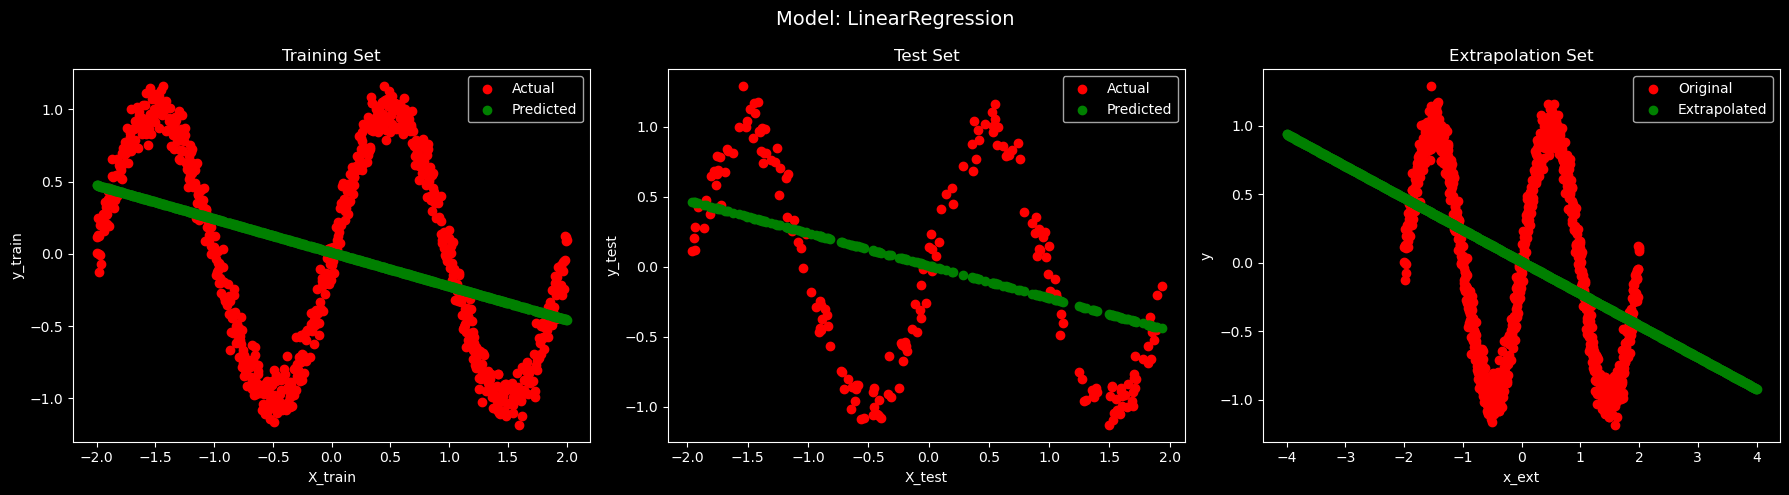


KNeighborsRegressor(n_neighbors=1)
 r2_train:   1.0
 r2_test:    0.95852
 rmse_train: 0.0
 rmse_test:  0.021803


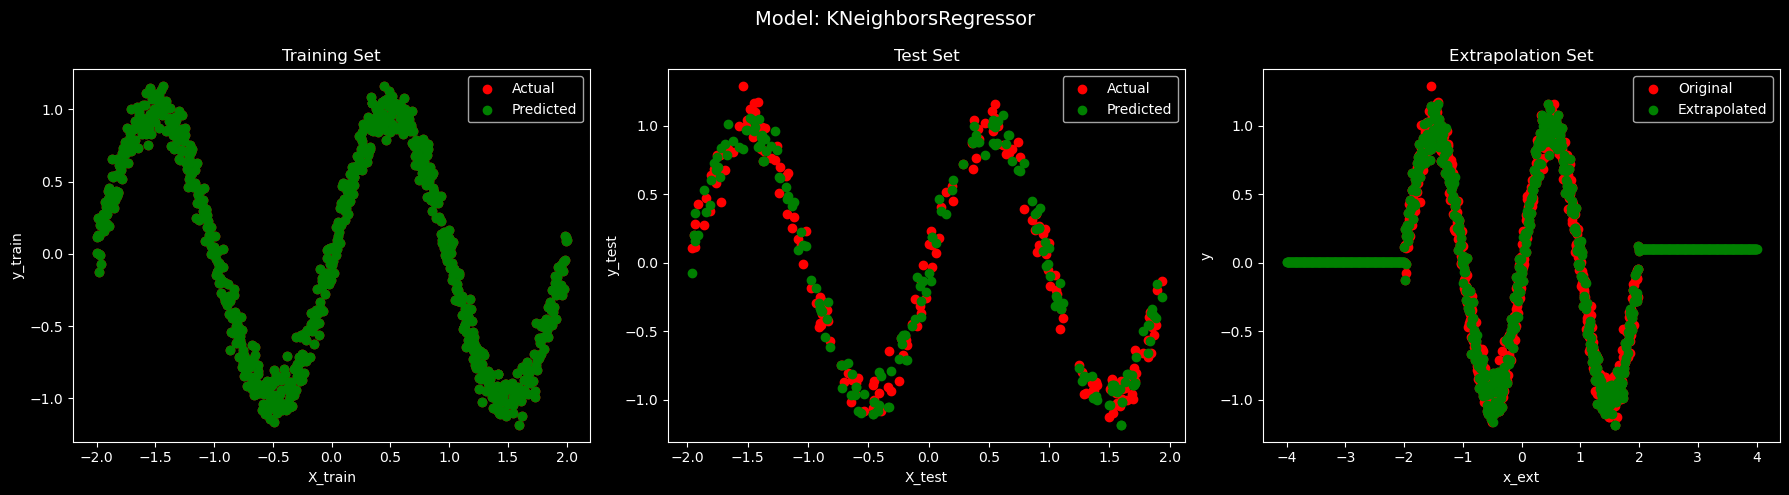


KNeighborsRegressor(n_neighbors=10)
 r2_train:   0.9838
 r2_test:    0.97586
 rmse_train: 0.0081723
 rmse_test:  0.012691


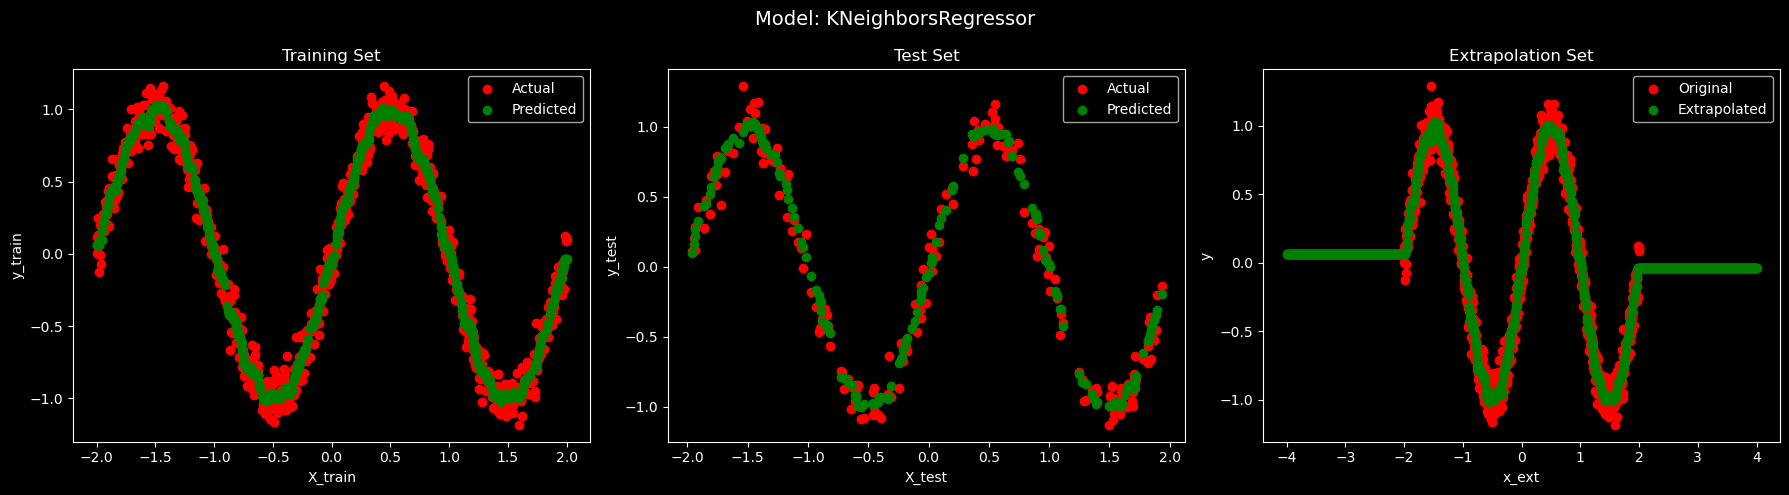


KNeighborsRegressor(n_neighbors=100)
 r2_train:   0.94307
 r2_test:    0.95347
 rmse_train: 0.028725
 rmse_test:  0.024458


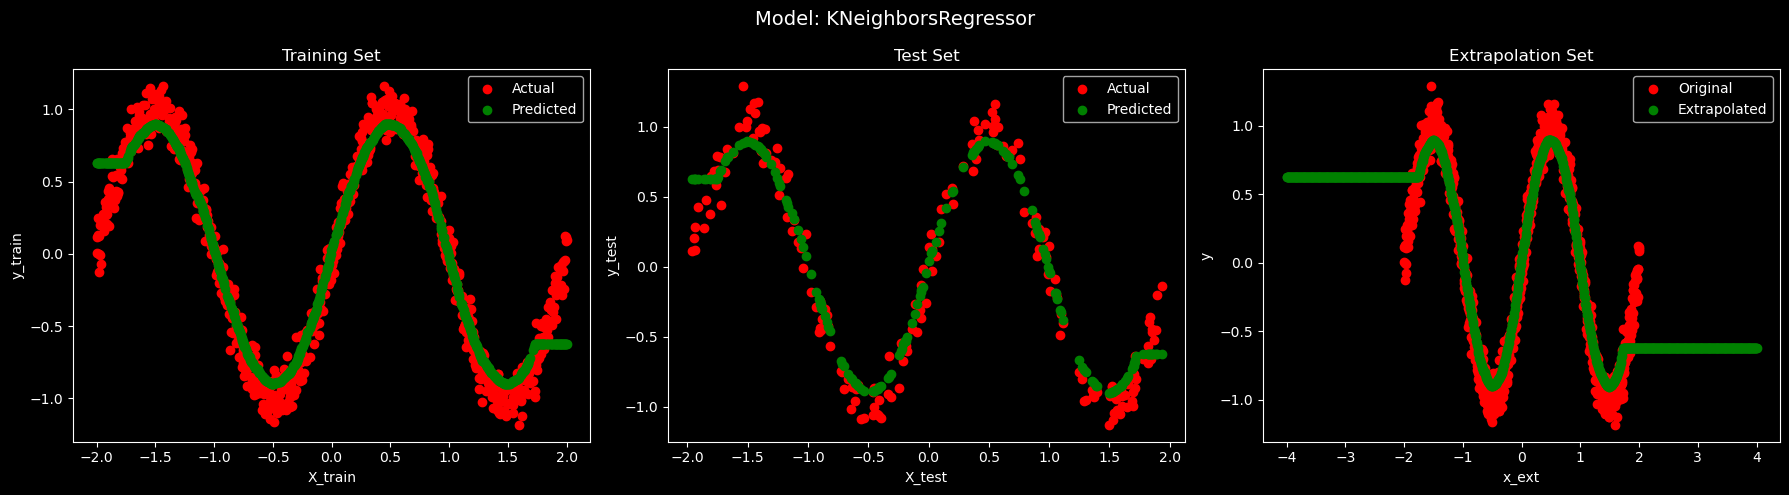


DecisionTreeRegressor(max_depth=2)
 r2_train:   0.43116
 r2_test:    0.47915
 rmse_train: 0.28699
 rmse_test:  0.2738


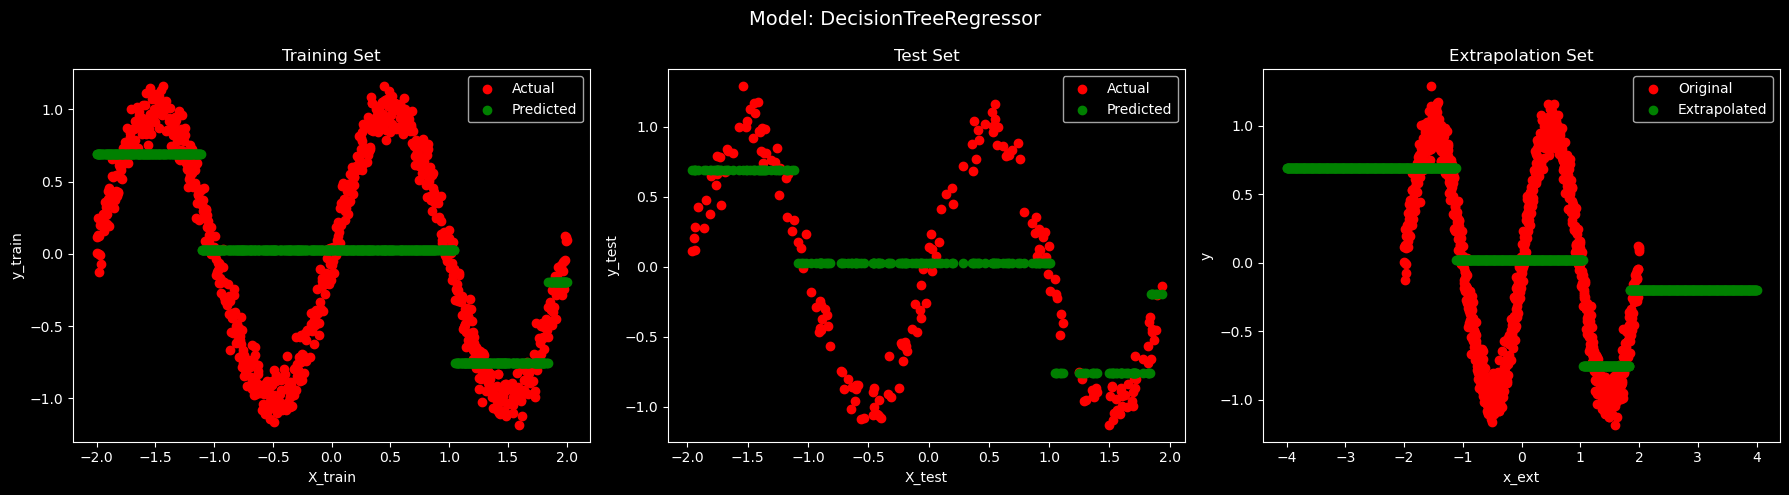


DecisionTreeRegressor(max_depth=5)
 r2_train:   0.95956
 r2_test:    0.94283
 rmse_train: 0.020405
 rmse_test:  0.030053


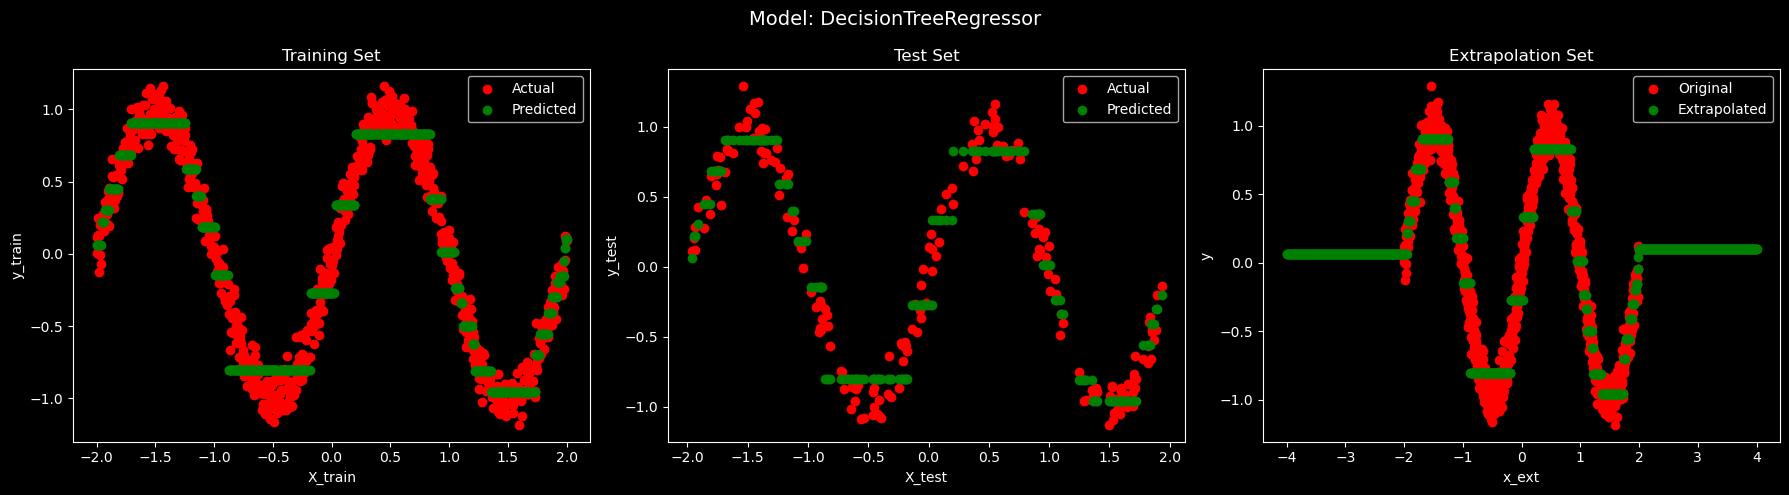


DecisionTreeRegressor(max_depth=10)
 r2_train:   0.99419
 r2_test:    0.96314
 rmse_train: 0.0029311
 rmse_test:  0.019378


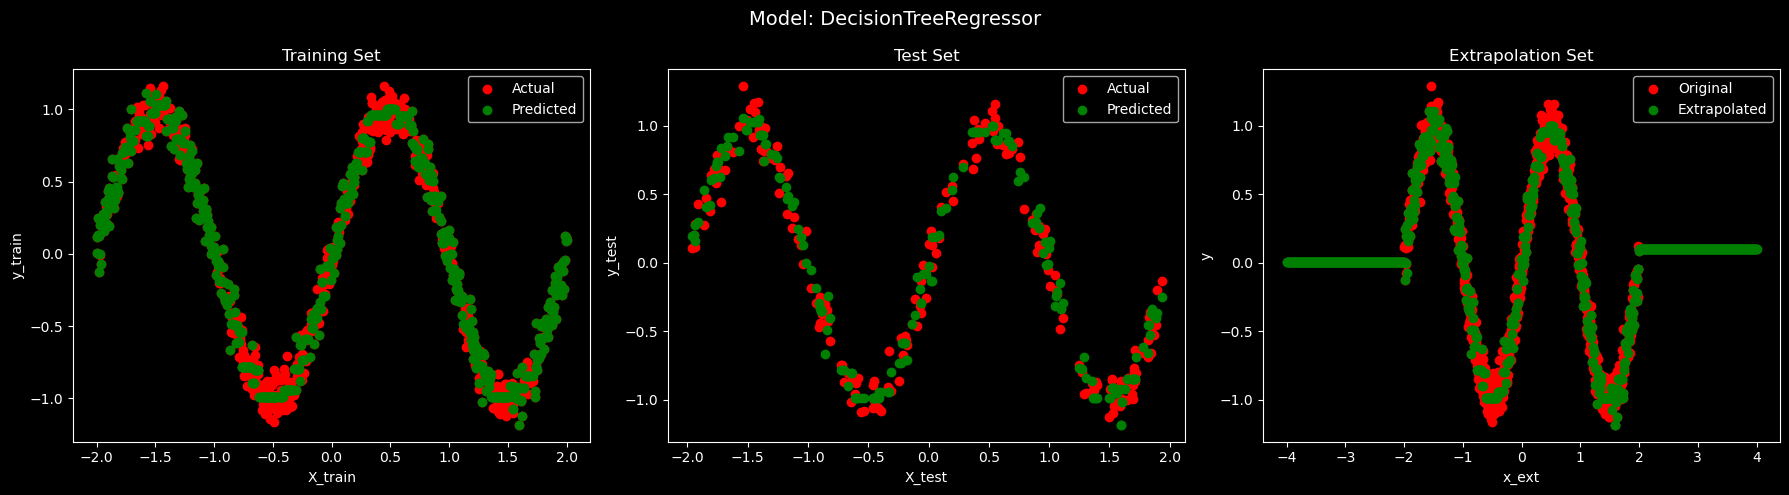


RandomForestRegressor(max_depth=5, n_estimators=10)
 r2_train:   0.97267
 r2_test:    0.96014
 rmse_train: 0.013786
 rmse_test:  0.020952


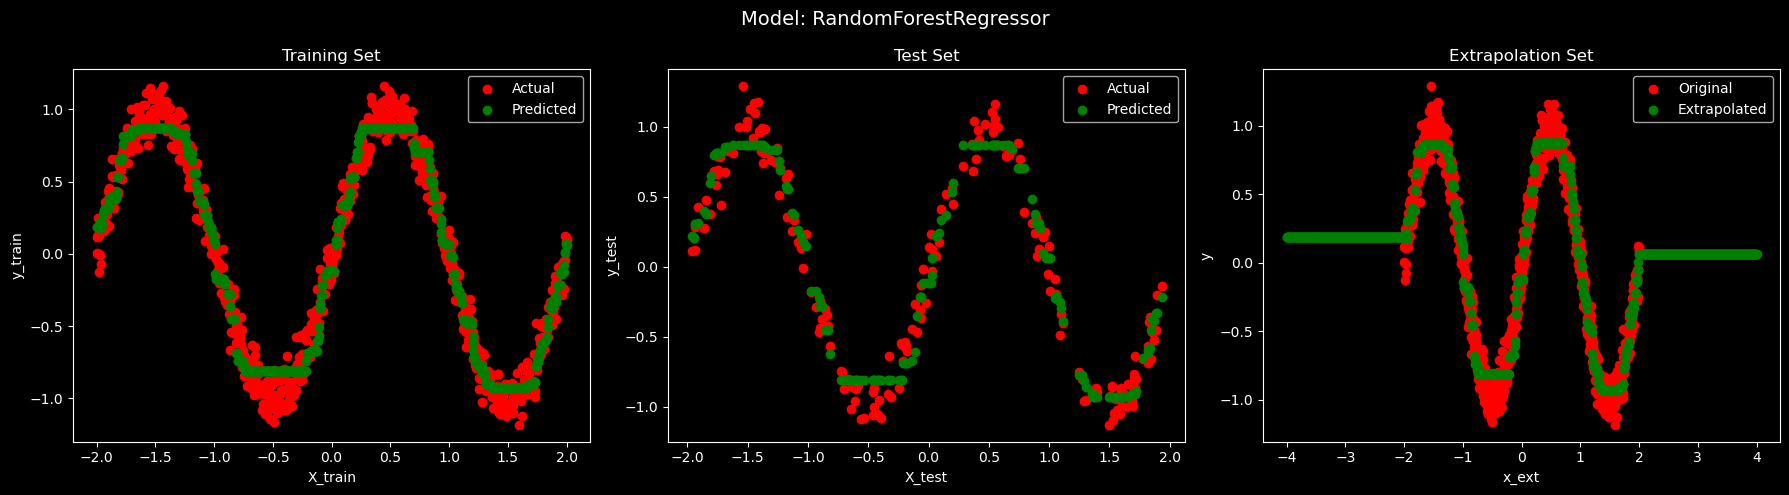


RandomForestRegressor(max_depth=10)
 r2_train:   0.99305
 r2_test:    0.97117
 rmse_train: 0.0035083
 rmse_test:  0.015157


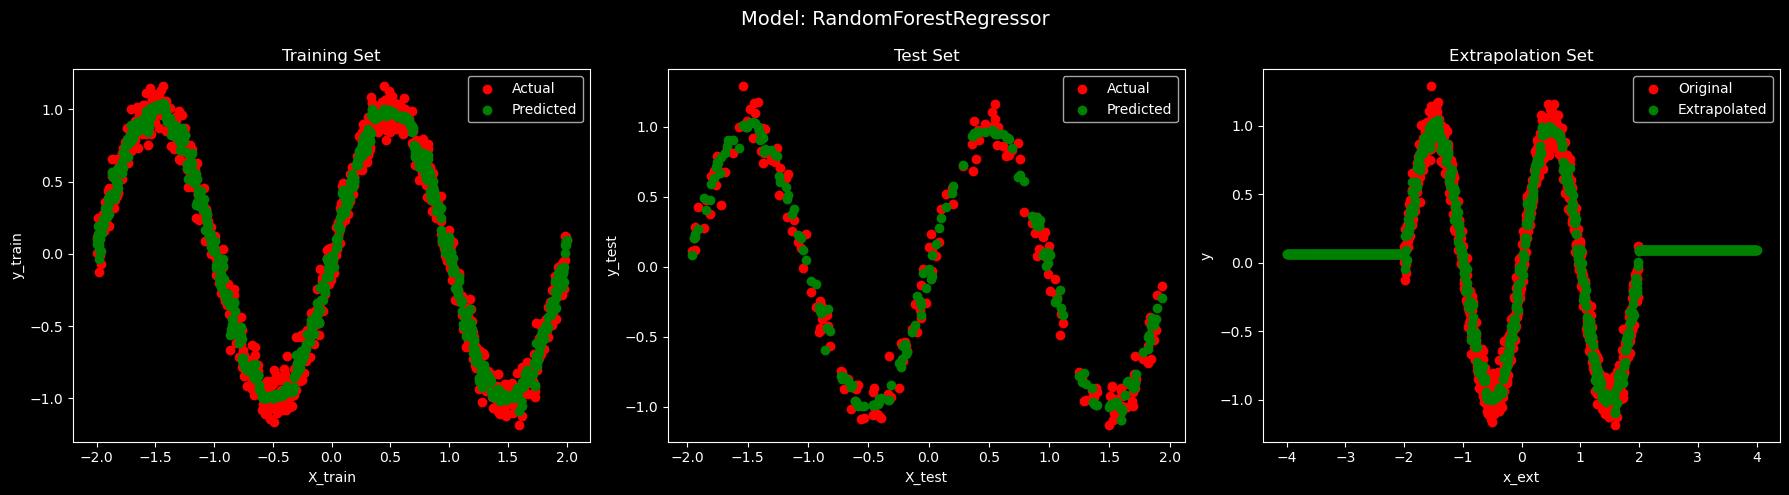


GradientBoostingRegressor(max_depth=2)
 r2_train:   0.9857
 r2_test:    0.97168
 rmse_train: 0.007214
 rmse_test:  0.014889


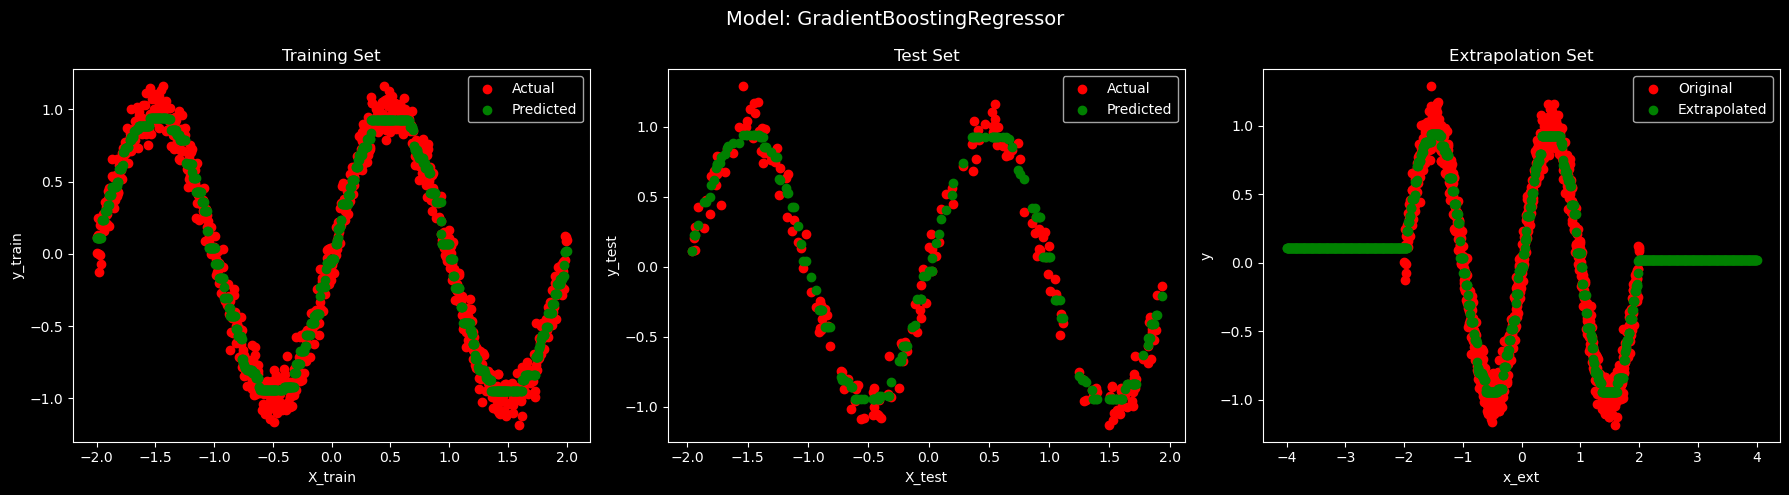


MLPRegressor(hidden_layer_sizes=(30, 20, 10), max_iter=1000, tol=1e-05)
 r2_train:   0.98158
 r2_test:    0.97825
 rmse_train: 0.009292
 rmse_test:  0.011433


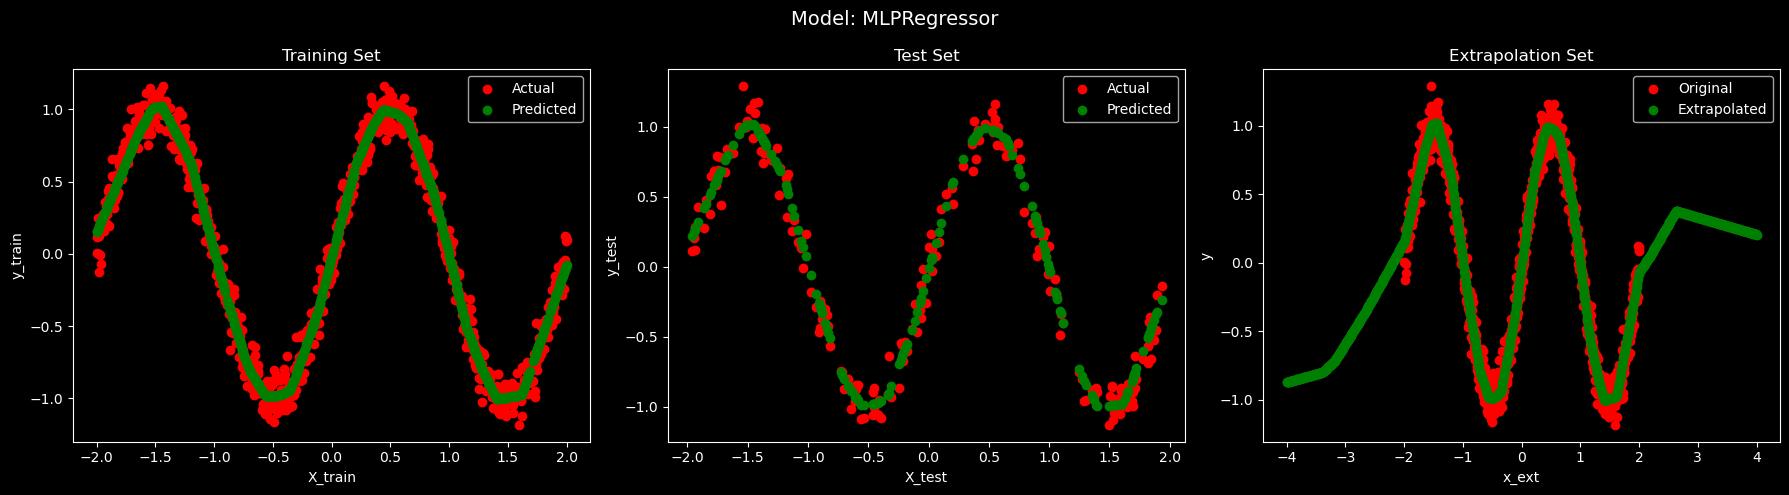

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

for m in models:
    m.fit(X_train, y_train)
    
    y_train_pred = m.predict(X_train)
    y_test_pred  = m.predict(X_test)
    y_ext_pred   = m.predict(x_ext[:, np.newaxis])
    
    print(m)
    
    r2_train = r2_score(y_train, y_train_pred)
    print(f' r2_train:   {r2_train:.5}')

    r2_test = r2_score(y_test, y_test_pred)
    print(f' r2_test:    {r2_test:.5}')
    
    rmse_train = mean_squared_error(y_train, y_train_pred)
    print(f' rmse_train: {rmse_train:.5}')

    rmse_test = mean_squared_error(y_test, y_test_pred)
    print(f' rmse_test:  {rmse_test:.5}')
    
    # Create side-by-side subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Training set plot
    axes[0].scatter(X_train, y_train, color='red', label='Actual')
    axes[0].scatter(X_train, y_train_pred, color='green', label='Predicted')
    axes[0].set_title('Training Set')
    axes[0].set_xlabel('X_train')
    axes[0].set_ylabel('y_train')
    axes[0].legend()
    
    # Test set plot
    axes[1].scatter(X_test, y_test, color='red', label='Actual')
    axes[1].scatter(X_test, y_test_pred, color='green', label='Predicted')
    axes[1].set_title('Test Set')
    axes[1].set_xlabel('X_test')
    axes[1].set_ylabel('y_test')
    axes[1].legend()
    
    # Extrapolation plot
    axes[2].scatter(x, y, color='red', label='Original')
    axes[2].scatter(x_ext, y_ext_pred, color='green', label='Extrapolated')
    axes[2].set_title('Extrapolation Set')
    axes[2].set_xlabel('x_ext')
    axes[2].set_ylabel('y')
    axes[2].legend()
    
    fig.suptitle(f'Model: {m.__class__.__name__}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print()
# end

### Cross validation

In [21]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

for m in models:
    print(m)
    
    cv_scores = cross_val_score(m, X, y, cv=kf, scoring='r2')
    cv_scores = pd.DataFrame(cv_scores)
    display(cv_scores.describe().T)
# end


LinearRegression()


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.154077,0.041361,0.085276,0.151848,0.166466,0.172637,0.194156


KNeighborsRegressor(n_neighbors=1)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.961166,0.00219,0.958756,0.959761,0.960443,0.962893,0.963975


KNeighborsRegressor(n_neighbors=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.979571,0.002166,0.97664,0.978647,0.97916,0.981523,0.981883


KNeighborsRegressor(n_neighbors=100)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.943489,0.01089,0.925926,0.940425,0.947659,0.950355,0.953082


DecisionTreeRegressor(max_depth=2)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.38889,0.069403,0.290011,0.352596,0.412293,0.418521,0.47103


DecisionTreeRegressor(max_depth=5)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.944041,0.004803,0.939468,0.940895,0.94373,0.944238,0.951872


DecisionTreeRegressor(max_depth=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.966052,0.001962,0.963815,0.964034,0.967247,0.967258,0.967908


RandomForestRegressor(max_depth=5, n_estimators=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.965596,0.001274,0.964187,0.964561,0.965462,0.966676,0.967096


RandomForestRegressor(max_depth=10)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.972731,0.001128,0.971466,0.97212,0.972389,0.973323,0.974358


GradientBoostingRegressor(max_depth=2)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.976465,0.003801,0.97044,0.975358,0.977553,0.97885,0.980124


MLPRegressor(hidden_layer_sizes=(30, 20, 10), max_iter=1000, tol=1e-05)


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.97866,0.002247,0.975976,0.9773,0.978068,0.980829,0.981129
